In [1]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pmdarima

In [26]:
unemployment=pd.read_excel("./data/InitialClaims.xls")
t=unemployment['FRED Graph Observations'].tolist()
c=unemployment['Unnamed: 1'].tolist()
time=[]
claims=[]
for i in t:
    if isinstance(i, datetime.datetime):
        time.append(i)
for j in c:
    if isinstance(j,int):
        claims.append(j)
d={'claims':claims,'date': time}
unemployment=pd.DataFrame(d)
unemployment=unemployment.set_index("date")
unemployment.tail()
unemployment=unemployment.loc['2006-01-10':'2020-12-28']
df=unemployment

jaw=pd.read_excel("./data/Jobs.xlsx")
jaw=jaw.set_index("date")
jaw.index = jaw.index -1 *pd.to_timedelta(1, unit='D')
fulldataset=unemployment.merge(jaw, left_index=True, right_index=True)
fulldataset.to_excel("./data/FullDataset.xlsx")
welfare=["Social Security","Social Security Office Locations","Unemployment Benefits","Social Security Gov", 
         "Unemployment Office","Food Stamps", "Department of Labor"]
jobs=["Monster","Indeed","Jobs","Job Search",
         "Resume","Job Search Engines","Linkedin","Hotjobs","Cover Letter"]
welfare=jaw[welfare]
jobs=jaw[jobs]
jobs.to_excel("./data/jobtrends.xlsx")
welfare.to_excel("./data/welfaretrends.xlsx")
jobs=pd.DataFrame(jobs.sum(axis=1),columns=["Jobs"])
welfare=pd.DataFrame(welfare.sum(axis=1),columns=["welfare"])
df=welfare.merge(jobs, left_index=True, right_index=True)

df=unemployment.merge(df, left_index=True, right_index=True)
df.to_excel("./data/DatasetSummed.xlsx")

In [41]:
unemployment.head()
from statsmodels.tsa.vector_ar.vecm import coint_johansen
x = df # dataframe of n series for cointegration analysis
jres=coint_johansen(x, det_order=0, k_ar_diff=1)
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')
joh_output(jres)

   max_eig_stat   trace_stat
0   1457.952930  1605.190810
1    120.806110   147.237880
2     26.431769    26.431769 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



In [38]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, AutoReg, AR, ARIMA
from statsmodels.tsa.base.datetools import dates_from_str
df=df.set_index(pd.Series(df.index.format()))

weekly = dates_from_str(df.index)
df=df[df.columns]
df.index = pandas.DatetimeIndex(weekly)
df=df
df["Jobs"] = (df["Jobs"]).diff()
# df["welfare"] = np.log2(df["welfare"])
# df["claims"] = np.log2(df["claims"])
df=df.dropna()
tmp=df[:-102]
# tmp=df[["claims","welfare"]]
# make a VAR model
model = VAR(tmp)
results = model.fit(maxlags=2, ic='aic')
results.summary()

C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, May, 2021
Time:                     16:36:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    34.6724
Nobs:                     678.000    HQIC:                   34.5866
Log likelihood:          -14571.6    FPE:                9.93679e+14
AIC:                      34.5324    Det(Omega_mle):     9.63526e+14
--------------------------------------------------------------------
Results for equation claims
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            518.068763      2199.528282            0.236           0.814
L1.claims          0.784331         0.037745           20.780           0.000
L1.welfare        59.645775        28.308816            2.107          

In [39]:
import math
lag_order = results.k_ar
# results.plot()
r=[]
time=  1
for i in range(51):
    
    r.append((results.forecast(df.values[-lag_order-102-time+i:-102-time+i], time)[time-1][0]))
#     print(results.forecast(df.values[-lag_order-102+i:-102+i], 4)[3][0])
    # results.plot_forecast(30)
print(r)

[219146.27005538822, 223196.81391911843, 213496.99664842512, 231128.80802162216, 234766.11318485887, 232643.43193527978, 223636.18641676393, 222566.31933629632, 221823.53502615748, 225219.84437687803, 220588.25168881484, 216527.91695474027, 213846.1280515379, 206346.8094471118, 203561.49945347887, 221519.87025376252, 229085.42883521158, 227736.8376666659, 218257.7410788943, 213355.0153349645, 218572.66870805869, 222284.02297192448, 219076.9115293732, 221453.5322334058, 224784.72355757892, 222786.82452262854, 213879.04322691142, 211853.95082160755, 215835.4442312332, 217282.4908201205, 214624.4656054221, 219748.49498919895, 215778.53213294045, 215760.1486923869, 219227.5861472377, 210950.77589569322, 209810.64710777588, 216907.10784233833, 217284.7618586801, 214756.05296777753, 217386.6147407279, 213629.9858262934, 216153.08702851582, 214109.3150174492, 220591.49758672368, 222830.0410792368, 214918.10605460012, 224336.45169702562, 229854.4205046764, 232404.80635280913, 219987.5367036803

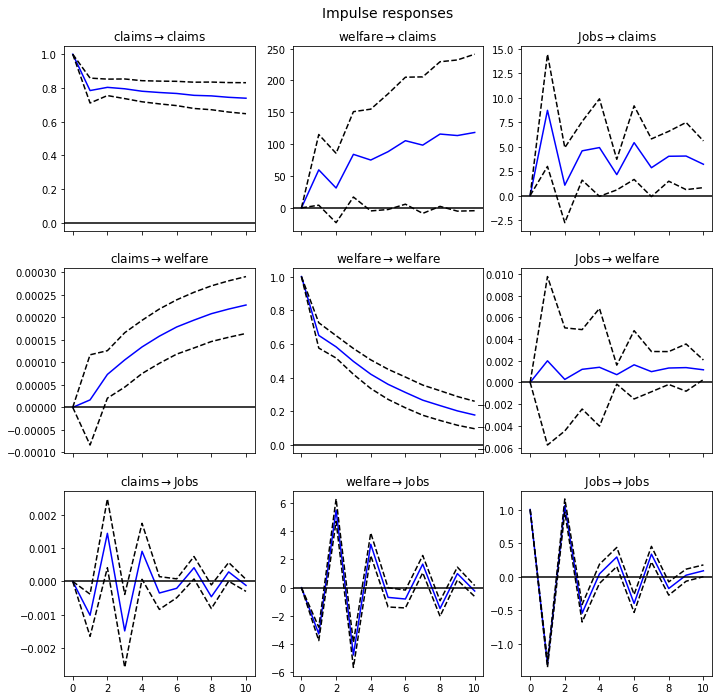

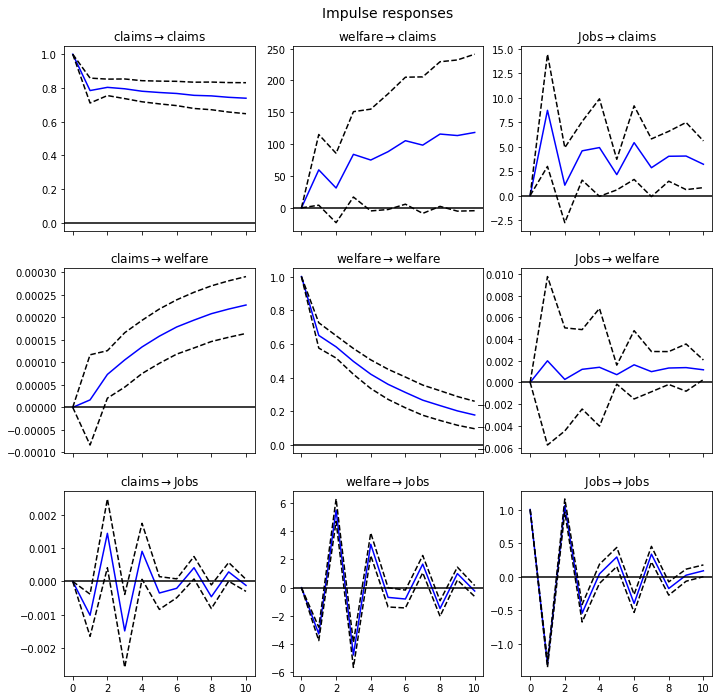

In [40]:
irf = results.irf(10)
irf.plot(orth=False)

In [82]:
def buildLaggedFeatures(s,lag=1,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        return None
    if dropna:
        return res.dropna()
    else:
        return res 


In [24]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df["Jobs"])
print("pvalue = ", pvalue,"  ", usedlag_, " if above 0.05, data is not stationary")

pvalue =  1.0927828133192994e-21    14  if above 0.05, data is not stationary


In [52]:
df.head()

,claims,welfare,Jobs
2006-01-14,12.560244,5.049512,6.167607
2006-01-21,12.577636,5.083660,6.133908
2006-01-28,12.549662,5.053374,6.241523
2006-02-04,12.574182,5.134080,6.210712
2006-02-11,12.604849,4.972809,6.095515


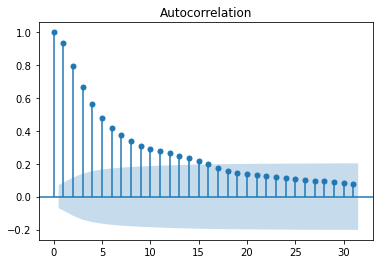

In [54]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(unemployment, lags=31)
plt.show()

In [88]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

Test MSE: 0.114


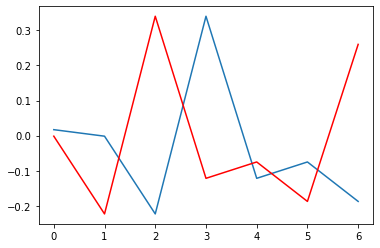

In [90]:
# create lagged dataset
values = DataFrame(df.values)
# dataframe = concat([values.shift(1), values], axis=1)
# split into train and test sets
X = values.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [12]:
196601.683
3945857142.857

3945857142.857

In [42]:
from statsmodels.tsa.stattools import adfuller
for i in df.columns:
    print("ADF Test for: ", i)
    result = adfuller(df[i])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Test for:  claims
ADF Statistic: -4.476194
p-value: 0.000217
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test for:  welfare
ADF Statistic: -3.611561
p-value: 0.005544
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test for:  Jobs
ADF Statistic: -16.781639
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [63]:

# diff().dropna()

In [35]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['claims'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-859.464, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-796.819, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1073.420, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-859.873, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-1173.229, Time=0.59 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-1296.134, Time=2.78 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=-1352.355, Time=4.57 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=-1358.399, Time=5.90 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=26.53 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=-1365.295, Time=12.97 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=-1365.870, Time=5.56 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=-1364.119, Time=7.75 sec
 ARIMA(1,1,0)(2,1,2)[12]

In [37]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  787
Model:             SARIMAX(2, 1, 0)x(3, 1, [1], 12)   Log Likelihood                 691.403
Date:                              Fri, 14 May 2021   AIC                          -1368.806
Time:                                      00:07:08   BIC                          -1336.245
Sample:                                           0   HQIC                         -1356.278
                                              - 787                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2862      0.063      4.561      0.000       0.163       0.409
ar.L2         -0.08

In [144]:

#Split data into train and test
size = int(len(df) * 0.66)
df=df[:-52]
# df.index = pd.DatetimeIndex(df.index).to_period('W')
X_train, X_test = df[0:size], df[size:len(df)]

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 


model = SARIMAX(X_train[['claims']],  
                order = (2, 1,0),  
                seasonal_order =(3, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 


#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted passengers') 
#Rename the column

# plot predictions and actual values 
# prediction.plot(legend = True) 
# X_test['claims'].plot(legend = True)
print(prediction)

C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


485    276438.091665
486    268491.274644
487    274915.651329
488    277282.043932
489    272944.311735
           ...      
678    149001.763602
679    154098.730190
680    154423.268688
681    152178.936750
682    156744.278934
Name: Predicted passengers, Length: 198, dtype: float64


C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [152]:
tmp=df[:-102]
# (2,1,0)
res = ARIMA(tmp["claims"],order=(2,1,0)).fit()
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
print(out.format(res.aic, res.hqic, res.bic))
# df.head()

AIC: 14968.092, HQIC: 14975.101, BIC: 14986.204


C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\somer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [153]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.claims   No. Observations:                  684
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7480.046
Method:                       css-mle   S.D. of innovations          13584.550
Date:                Sat, 15 May 2021   AIC                          14968.092
Time:                        19:36:03   BIC                          14986.204
Sample:                             1   HQIC                         14975.101
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -102.3392    348.262     -0.294      0.769    -784.919     580.241
ar.L1.D.claims    -0.2643      0.037     -7.103      0.000      -0.337      -0.191
ar.L2.D.claims    -0.2282      0.037     -6.138      0.000      -0.301      -0.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5790           -2.0115j            2.0932           -0.2946
AR.2           -0.5790           +2.0115j            2.0932            0.2946
-----------------------------------------------------------------------------
"""

In [162]:


arr=list(res.predict(1,2df["claims"][-3:-1]))
print(arr)

SyntaxError: invalid syntax (<ipython-input-162-d2b754ff2ed6>, line 1)

In [160]:
df["claims"][-3:-1]

2020-12-12    873000
2020-12-19    803000
Name: claims, dtype: int64